In [1]:
dataset_path = "D:/datasets/stanford-dogs-dataset"
model_path = "D:/YandexDisk/models/dog-breed-classifier.h5"

from tensorflow.keras.models import load_model
from keras.applications.densenet import preprocess_input
from numpy import expand_dims
from os import listdir, system
from PIL import Image
from skimage.io import imread
from matplotlib.pyplot import figure, imshow, axis
import warnings
warnings.filterwarnings("ignore")

model = load_model(model_path)

imgs_path = dataset_path + "/images/Images"
breed_dirs_list = listdir(imgs_path)

idx_dir_map = {}
for i, v in enumerate(breed_dirs_list):
    idx_dir_map.update({i : v})

def download_and_predict(url, file_name):
    system("curl -s {} -o {}".format(url, file_name))
    img = Image.open(file_name)
    img = img.convert("RGB")
    img = img.resize((224, 224))
    img.save(file_name)

    figure(figsize=(4, 4))
    imshow(img)
    axis("off")

    img = imread(file_name)
    img = preprocess_input(img)
    img = expand_dims(img, axis=0)
    probs = model.predict(img)
    
    for idx in probs.argsort()[0][::-1][:5]:
        print("{:.2f}%".format(probs[0][idx]*100), "\t", idx_dir_map[idx].split("-")[-1])

99.99% 	 pug
0.00% 	 bull_mastiff
0.00% 	 Brabancon_griffon
0.00% 	 Tibetan_mastiff
0.00% 	 Norwegian_elkhound


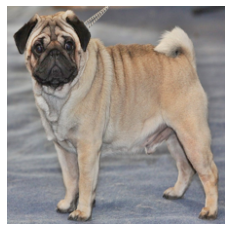

In [2]:
download_and_predict("https://upload.wikimedia.org/wikipedia/commons/f/f0/Mops_oct09_cropped2.jpg",
                     "pug.jpg")

99.69% 	 Doberman
0.26% 	 miniature_pinscher
0.05% 	 tan_coonhound
0.00% 	 toy_terrier
0.00% 	 Mexican_hairless


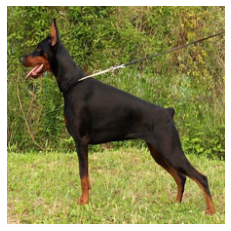

In [3]:
download_and_predict("https://upload.wikimedia.org/wikipedia/commons/7/7a/European_Dobermann.jpg",
                     "doberman.jpg")

100.00% 	 chow
0.00% 	 Tibetan_mastiff
0.00% 	 Samoyed
0.00% 	 Pomeranian
0.00% 	 Newfoundland


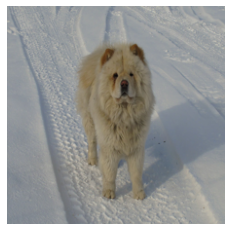

In [4]:
download_and_predict("https://upload.wikimedia.org/wikipedia/commons/c/c7/ChowChow1.jpg",
                     "chow.jpg")